Домашнее задание по теме «Основныебиблиотеки: MatplotLib/Seaborn/Plotly»


Задача №1

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [112]:
# Функция y(x)
def y(x): 
    return np.cos(20 * x) / (x + 0.1)
# Генерируем массив
ax = np.arange(0, 4, 0.01)
ay = y(ax)

In [113]:
# Фукнция для вывода графика с помощью библиотеки Matplotlib
def plt_mpl():
    plt.figure(figsize=(5, 3))
    plt.plot(ax, ay)
    plt.title('График функции в Matplotlib')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [114]:
# Функция вывода графика с помощью библиотеки Seaborn
def plt_sns():
    plt.figure(figsize=(5, 3))
    sns.lineplot(x=ax, y=ay)
    plt.title('График функции в Seaborn')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [115]:
# Функция вывода графика с помощью библиотеки Plotly
def plt_pll():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=ax, y=ay, mode='lines'))
    fig.update_layout(title='График функции в Plotly',
                        xaxis_title='x',
                        yaxis_title='y',
                        margin=dict(l=0, r=20, t=50, b=50),
                        width=457,  
                        height=300)
    
    fig.show()
    

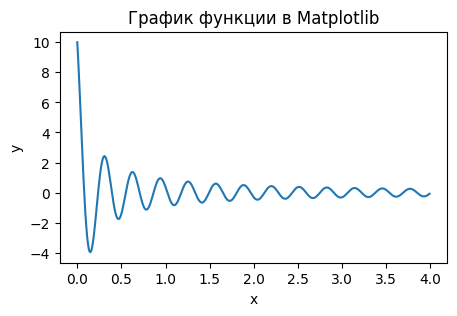

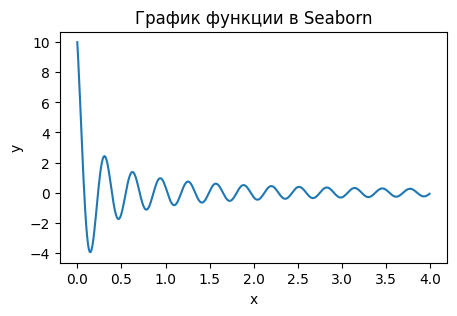

In [116]:
# Выводим графики
plt_mpl()
plt_sns()
plt_pll()

Дублирую .png

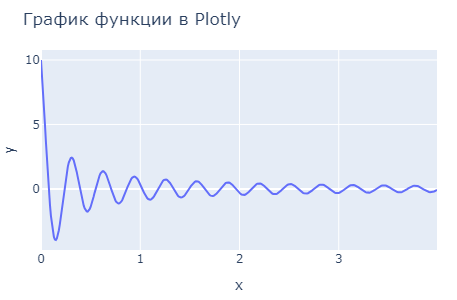

Задача №2

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/car_data.csv')
df.rename(columns={
    'Annual Income': 'annual_income',
    'Gender': 'gender',
    'Color' : 'color',
    'Dealer_Region': 'region',
    'Body Style': 'style',
    'Price ($)': 'price',
    'Company': 'company'
}, inplace=True)
# df.to_excel('data/car_data.xlsx')
# На всякий случай заполню пропуски средним в колонках цена и годовой доход
df['price'] = df['price'].fillna(df['price'].mean())
df['annual_income'] = df['annual_income'].fillna(df['annual_income'].mean())

In [118]:
def plot_boxplot(data, num_col, cat_col): # функция вывода диаграммы "box-plot"
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=num_col, y=cat_col, data=data, orient='h', color='r')
    plt.title(f'Box-plot: {num_col} by {cat_col}')
    plt.xlabel(num_col)
    plt.ylabel(cat_col)
    plt.grid(True)
    plt.show()

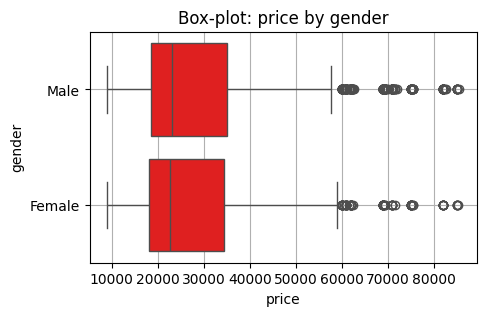

In [119]:
plot_boxplot(df,'price','gender') # Вызов "box-plot" по цене и полу

In [120]:
# Для упрощение визуализации графика "scatter" отберу 200 максимальных значений по полю годовой доход
# сделано это исключительно для уменьшения количества точек, понимаю, что для анализа нужно использовать все данные
tpm200 = df[['annual_income', 'price', 'region']].nlargest(200, 'annual_income') 

In [121]:
def plot_scatter(data, x_column, y_column, hue_column): # функция вывода диаграммы "scatter"
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
    plt.title(f'Scatter plot of {x_column} vs {y_column} colored by {hue_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend(title=hue_column)
    plt.grid(True)
    plt.show()

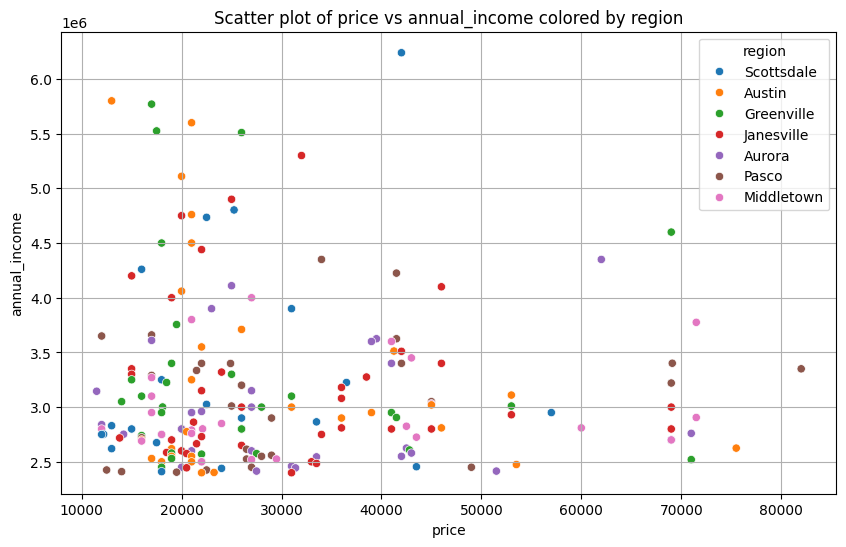

In [122]:
plot_scatter(tpm200, 'price', 'annual_income','region') #  Вызов точечного графика по цене, годовому доходу и региону 

In [123]:
def plot_count(data, category_column1, category_column2): # функция вывода диаграммы "count plot"
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x=category_column1, hue=category_column2)
    plt.title(f'Count plot of {category_column1} by {category_column2}')
    plt.xlabel(category_column1)
    plt.ylabel('Count')
    plt.legend(title=category_column2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.show()

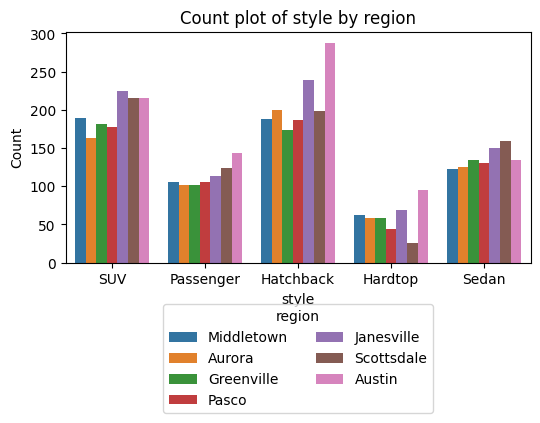

In [124]:
plot_count(df, 'style', 'region') # Вызов "count plot" по типу кузова авто и региону

Задача №3

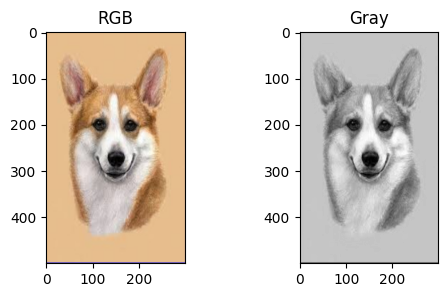

In [125]:
# Дублирую импорт библиотек, импортирую новые
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
rgb_img = mpimg.imread('data/corg.jpg') # Загружаем рисунок
weights = [0.2989, 0.5870, 0.1140] # вектор с весами для преобразования RGB в оттенки серого
g_img = np.dot(rgb_img[..., :3], weights) # Преобразуем в оттенки серого скалярным умножением матрицы и вектора весов
figure, (left,right) = plt.subplots(1,2,figsize=(6, 3)) # Делим график на две части в горизонте
left.imshow(rgb_img) # вывод рисунка RGB
left.set_title('RGB')
right.imshow(g_img, cmap='gray') # Вывод рисунка gray
right.set_title('Gray')
plt.show()